# eCommerce Customer Service Satisfaction

## About Dataset
The dataset captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym). It includes various features such as category and sub-category of interaction, customer remarks, survey response date, category, item price, agent details (name, supervisor, manager), and CSAT score etc.

Note: Please be advised that the authentic information has been obfuscated, and the dataset has been fabricated using the Faker library to ensure the concealment of genuine details

**Data Source:** https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction?resource=download 

### Problem Statement
Shopzilla is facing high cost for customer acquisition, which affects it’s profit. Study shows that customer lifetime value is directly proportional to the retention rate. A 5% increase in customer retention can produces more than 25% increase in profit. The company is currently working to improve customer service quality, enhance overall customer satisfaction, and increase customer retention.

### Objectives
1. Identify key drivers of customer satisfaction by using decision tree
2. Conduct a time-series analysis to observe trends and patterns in customer satisfaction over the one-month period.
3. Enhance accuracy of model such that factors influencing both bad and good experience can be identified such that 
they may be rectified and reinforced
4. Classify CSAT score
5. Complete capstone by deadline

## Exploratory Data Analysis

### Import Libraries

In [1]:
# Import libraries.
import pandas as pd
import numpy as np

### Read in Data

In [2]:
df = pd.read_csv('Customer_support_data.csv')
df.columns = df.columns.str.replace(' ', '_') # Rename header Ex: Unique id to Unique_id
df.columns = df.columns.str.lower() # Rename header Ex: Unique_id to unique_id

In [3]:
df.head(3)

,unique_id,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5


### Create summary for df

In [4]:
def summary(df):
    # Create new data frame
    summy = pd.DataFrame(df.dtypes, columns=['data_type'])
    
    # Add columns
    summy['total_na'] = df.isnull().sum().values
    summy['duplicate'] = df.duplicated().sum()
    summy['unique'] = df.nunique().values
    return summy

print(df.shape)
summary(df)

(85907, 20)


,data_type,total_na,duplicate,unique
unique_id,object,0,0,85907
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
customer_remarks,object,57165,0,18231
order_id,object,18232,0,67675
order_date_time,object,68693,0,13766
issue_reported_at,object,0,0,30923
issue_responded,object,0,0,30262
survey_response_date,object,0,0,31


In [5]:
df['csat_score'].value_counts()

csat_score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64

### Fill null values
There are large number of null values in `customer_remarks`, `order_id`, `order_date_time`, `customer_city`, `product_category`,	`item_price`, and `connected_handling_time` columns. So, we'll check for correlation to see if we may drop them. 

Before that, we will first drop the `unique_id`, `customer_remarks`, `order_id`, and `order_date_time` column as it is not neccesary for modeling and it will take up much computing power when we dummify categorical variables. (Example: `Unique_id` have 85907 unique vallue)

In [6]:
df.drop(columns = ['unique_id', 'customer_remarks','order_id', 'order_date_time'], inplace = True)
df.head(1)

,channel_name,category,sub-category,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


There are some duplicates found after dropping the colums, however, these duplicate need not be removed as they each have `unique_id` as shown in the previous summary, which shows that they are unique records.

In [7]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,9,3
category,object,0,9,12
sub-category,object,0,9,57
issue_reported_at,object,0,9,30923
issue_responded,object,0,9,30262
survey_response_date,object,0,9,31
customer_city,object,68828,9,1782
product_category,object,68711,9,9
item_price,float64,68701,9,2789
connected_handling_time,float64,85665,9,211


Next, we'll fill the null values as needed for the remaining columns:  `customer_city`, `product_category`,	`item_price`, and `connected_handling_time`.

#### Filling `customer_city` NaN

In [8]:
# Identify the non-null values and their frequencies
non_na_values = df['customer_city'].dropna().value_counts()
total_na = df['customer_city'].isna().sum()

In [9]:
# There are 1782 unique city
non_na_values 

customer_city
HYDERABAD    722
NEW DELHI    688
PUNE         435
MUMBAI       406
BANGALORE    352
            ... 
GUNTAKAL       1
MANSAR         1
BAGHMARA       1
HINDORIA       1
DORAHA         1
Name: count, Length: 1782, dtype: int64

In [10]:
total_na

68828

Here is an example of how the following code will works:

<table>
  <tr>
    <th>Original DataFrame:</th>
    <th>DataFrame with NaN values filled evenly:</th>
  </tr>
  <tr>
    <td style="text-align: center;">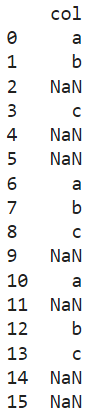</td>
    <td style="text-align: center;">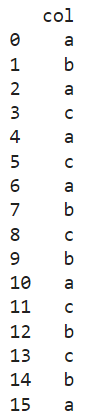</td>
  </tr>
</table>

**Example:** \
If we have 7 NaN and 3 unique value a, b, c:\
&emsp;total_na = 7\
&emsp;len(non_na_values) = 3\
&emsp;times = 3 // 7 = 2\
&ensp;Then the distribution list will be `['a', 'a', 'b', 'b', 'c', 'c']` \
We used '*extend*' instead of '*append*' here such that the above will be displayed and not [['a', 'a'], ['b', 'b'], ['c', 'c']]

After balancing the remaining NaNs, if any:\
&ensp;The disribution list will become `['a', 'a', 'b', 'b', 'c', 'c', 'a']` 

After shuffling:\
&ensp;The distribution list will be shuffled: `['a', 'a', 'c', 'b', 'c', 'b', 'a']` \
Seed is used to ensure reproducibility.\
Shuffling ensures that each value is randomly distributed across the NaN positions.

The distribution list will eventually hold the values that will be used to fill the NaN values in the DataFrame. 

In [11]:
# Calculate the proportional distribution
distribution = []
for value, count in non_na_values.items():
    times = total_na // len(non_na_values)
    distribution.extend([value] * times)

In [12]:
# Balance the remaining NaNs, if any
remaining_na = total_na - len(distribution)
for i in range(remaining_na):
    distribution.append(non_na_values.index[i % len(non_na_values)])

In [13]:
# Shuffle the distribution to randomize (optional)
np.random.seed(42)
np.random.shuffle(distribution)

In [14]:
# Fill the NaN values with the calculated distribution
df.loc[df['customer_city'].isna(), 'customer_city'] = distribution

#### Filling `product_category` NaN

In [15]:
# Make a function to fill NaN
def fill_na(df, col_name):
  # Identify the non-null values and their frequencies
  non_na_values = df[col_name].dropna().value_counts()
  total_na = df[col_name].isna().sum()

  # Calculate the proportional distribution
  distribution = []
  for value, count in non_na_values.items():
      distribution.extend([value] * (total_na // len(non_na_values)))

  # Balance the remaining NaNs, if any
  remaining_na = total_na - len(distribution)
  for i in range(remaining_na):
      distribution.append(non_na_values.index[i % len(non_na_values)])

  # Shuffle the distribution to randomize (optional)
  np.random.seed(42)
  np.random.shuffle(distribution)

  # Fill the NaN values with the calculated distribution
  df.loc[df[col_name].isna(), col_name] = distribution

In [16]:
fill_na(df, 'product_category')

#### Filling `item_price` NaN 

In [17]:
fill_na(df, 'item_price')

#### Filling `connected_handling_time` NaN
For this column, an initial guess is that this may be the calculated difference between the columns `issue_responded` and `issue_reported_at`. After calculating and checking back at the definition, it is found that they are irrelevant. Hence, the same approach is used to fill NaN. 

In [18]:
fill_na(df, 'connected_handling_time')

Now, all NaN values are filled

### Check correlation

#### Dealing with `issue_reported_at` and `issue_responded`
It looks possible to reduce the number of unique values in `issue_reported_at` and `issue_responded` by splitting them into date and time columns. Since the new columns are derived from the old columns, it is uneccesary to check correlation before dropping the two columns.

In [19]:
df[['reported_date', 'reported_time']] = df['issue_reported_at'].str.split(' ', expand=True)

In [20]:
df[['responded_date', 'responded_time']] = df['issue_responded'].str.split(' ', expand=True)

Some issue are reported in July, but responded in August

In [21]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
issue_reported_at,object,0,0,30923
issue_responded,object,0,0,30262
survey_response_date,object,0,0,31
customer_city,object,0,0,1782
product_category,object,0,0,9
item_price,float64,0,0,2789
connected_handling_time,float64,0,0,211


In [22]:
df['reported_date'].unique()

array(['01/08/2023', '02/08/2023', '31/07/2023', '30/07/2023',
       '29/07/2023', '28/07/2023', '03/08/2023', '04/08/2023',
       '05/08/2023', '06/08/2023', '07/08/2023', '08/08/2023',
       '09/08/2023', '10/08/2023', '12/08/2023', '11/08/2023',
       '13/08/2023', '14/08/2023', '15/08/2023', '16/08/2023',
       '17/08/2023', '18/08/2023', '19/08/2023', '20/08/2023',
       '21/08/2023', '22/08/2023', '23/08/2023', '24/08/2023',
       '25/08/2023', '26/08/2023', '27/08/2023', '28/08/2023',
       '29/08/2023', '30/08/2023', '31/08/2023'], dtype=object)

In [23]:
df['responded_date'].unique()

array(['01/08/2023', '02/08/2023', '03/08/2023', '04/08/2023',
       '05/08/2023', '06/08/2023', '07/08/2023', '08/08/2023',
       '09/08/2023', '10/08/2023', '12/08/2023', '11/08/2023',
       '13/08/2023', '14/08/2023', '15/08/2023', '16/08/2023',
       '17/08/2023', '18/08/2023', '19/08/2023', '20/08/2023',
       '21/08/2023', '22/08/2023', '23/08/2023', '24/08/2023',
       '25/08/2023', '26/08/2023', '27/08/2023', '28/08/2023',
       '29/08/2023', '30/08/2023', '31/08/2023'], dtype=object)

`reported_date`, `reported_time`, `responded_date`, and `responded_time` reduced the number of unique values greatly. However, they are still many and they are not suitable to be taken as categorical data.

Try to find difference between `issue_reported_at` and `issue_responded` and by changing them to datetime, and then convert to float data.

In [24]:
# Convert `issue_reported_at` and `issue_responded` to datetime
df['issue_reported_at'] = pd.to_datetime(df['issue_reported_at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

In [25]:
# Create a new column: time taken to respond in minutes
time_taken = ((df['issue_responded'] - df['issue_reported_at']).dt.seconds/60)

In [26]:
# Insert the column 'time_taken' into desired place, after `issue_responded`
df.insert(5, 'time_taken', time_taken)
df.head(3)

,channel_name,category,sub-category,issue_reported_at,issue_responded,time_taken,survey_response_date,customer_city,product_category,item_price,...,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,reported_date,reported_time,responded_date,responded_time
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,34.0,01-Aug-23,SRIPERUMPUDUR,Home Appliences,2028.0,...,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,01/08/2023,11:13,01/08/2023,11:47
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,2.0,01-Aug-23,OTTAPALAM,Electronics,20370.0,...,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,01/08/2023,12:52,01/08/2023,12:54
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,22.0,01-Aug-23,DIGAPAHANDI,Furniture,840.0,...,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,01/08/2023,20:16,01/08/2023,20:38


#### Check `survey_response_date` and `responded_date`
The following code shows that `survey_response_date` and `responded_date` are the same after being converted to the same format.

Since 
* `survey_response_date` is equal to `responded_date`
* `reported_date`, `reported_time`, `responded_date`, and `responded_time` are derived from `issue_reported_at` and `issue_responded`
* the new column `time_taken` is the difference or `issue_reported_at` and `issue_responded`

These columns above are dropped, except `time_taken`

In [27]:
# Check if 'survey_response_date' and 'responded_date' are the same
are_columns_same = df['survey_response_date'].equals(df['responded_date'])
print(f"Are 'survey_response_date' and 'responded_date' the same? {are_columns_same}")

Are 'survey_response_date' and 'responded_date' the same? False


In [28]:
# Convert the column to datetime
df['survey_response_date'] = pd.to_datetime(df['survey_response_date'], format='%d-%b-%y')
df['survey_response_date'].head()

0   2023-08-01
1   2023-08-01
2   2023-08-01
3   2023-08-01
4   2023-08-01
Name: survey_response_date, dtype: datetime64[ns]

In [29]:
# Format the datetime to the desired format
df['survey_response_date'] = df['survey_response_date'].dt.strftime('%d/%m/%Y')
df['survey_response_date'].head()

0    01/08/2023
1    01/08/2023
2    01/08/2023
3    01/08/2023
4    01/08/2023
Name: survey_response_date, dtype: object

In [30]:
# Check if 'survey_response_date' and 'responded_date' are the same
are_columns_same = df['survey_response_date'].equals(df['responded_date'])
print(f"Are 'survey_response_date' and 'responded_date' the same? {are_columns_same}")

Are 'survey_response_date' and 'responded_date' the same? True


In [31]:
# Drop columns
df.drop(columns = ['survey_response_date', 'responded_date', 'reported_date', 'reported_time', 
                   'responded_date', 'responded_time', 'issue_reported_at', 'issue_responded'], inplace = True)
df.head(1)

,channel_name,category,sub-category,time_taken,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,34.0,SRIPERUMPUDUR,Home Appliences,2028.0,424.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


#### Check correlation for numeric data
The numeric columns are dropped as their correlation with `csat_score` is less than ±0.7

In [32]:
# Check corr for numeric data
df.corr(numeric_only=True)

,time_taken,item_price,connected_handling_time,csat_score
time_taken,1.000000,-0.009121,-0.001232,-0.127103
item_price,-0.009121,1.000000,-0.002331,-0.014465
connected_handling_time,-0.001232,-0.002331,1.000000,-0.001962
csat_score,-0.127103,-0.014465,-0.001962,1.000000


In [33]:
# Drop columns
df.drop(columns = ['time_taken', 'item_price', 'connected_handling_time'], inplace = True)
df.head(1)

,channel_name,category,sub-category,customer_city,product_category,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,SRIPERUMPUDUR,Home Appliences,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


#### Check correlation for `channel_name`, `category`, `sub-category`
The columns are dummified selectively as it takes a lot of computing power to check all correlation together. The columns are dropped if their correlation with `csat_score` is less than ±0.7.

All dummified columns for `channel_name`, `category`, `sub-category` have correlation less than ±0.7.

In [34]:
# function to dummify selected columns
def dummify_selectively(df, columns_to_dummify):
    
  # Step 1: Create dummy variables for the selected columns
  df_dummies = pd.get_dummies(df[columns_to_dummify])

  # Step 2: Combine the dummy DataFrame with the target column
  df_combined = pd.concat([df['csat_score'], df_dummies], axis=1)
  return df_combined

In [35]:
df_dumified1 = dummify_selectively(df, ['channel_name',	'category', 'sub-category'])
df_dumified1.head(1)

,csat_score,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,...,sub-category_Shopzilla Rewards,sub-category_Signup Issues,sub-category_Technician Visit,sub-category_UnProfessional Behaviour,sub-category_Unable to Login,sub-category_Unable to track,sub-category_Wallet related,sub-category_Warranty related,sub-category_Wrong,sub-category_e-Gift Voucher
0,5,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df_dumified1.corr().head(1)

,csat_score,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,...,sub-category_Shopzilla Rewards,sub-category_Signup Issues,sub-category_Technician Visit,sub-category_UnProfessional Behaviour,sub-category_Unable to Login,sub-category_Unable to track,sub-category_Wallet related,sub-category_Warranty related,sub-category_Wrong,sub-category_e-Gift Voucher
csat_score,1.0,-0.047513,0.013088,0.00916,0.003689,-0.029669,-0.010028,-0.001725,0.000387,-0.064475,...,0.002388,0.022284,-0.036291,-0.010028,-0.011873,0.000829,0.003317,-0.010059,0.03728,-0.005412


In [37]:
# function to get df with high correlation with cat_score
def drop_low_corr_columns(df, target_column, threshold=0.7):

    # Calculate the correlation matrix
    corr_matrix = df.corr()
    print("\nCorrelation Matrix:\n", corr_matrix)

    # Identify columns with correlation less than the threshold with the target column
    low_corr_columns = corr_matrix[target_column][corr_matrix[target_column].abs() < threshold].index
    print(f"\nColumns to drop (correlation < {threshold} with {target_column}):\n", low_corr_columns)

    # Drop the identified columns
    df_reduced = df.drop(columns=low_corr_columns)
    print("\nDataFrame after dropping low-correlation columns:\n", df_reduced)

    return df_reduced

In [38]:
df_dumified1_dropped = drop_low_corr_columns(df_dumified1, 'csat_score', threshold=0.7)


Correlation Matrix:
                                csat_score  channel_name_Email  \
csat_score                       1.000000           -0.047513   
channel_name_Email              -0.047513            1.000000   
channel_name_Inbound             0.013088           -0.374032   
channel_name_Outcall             0.009160           -0.086922   
category_App/website             0.003689            0.000089   
...                                   ...                 ...   
sub-category_Unable to track     0.000829            0.006121   
sub-category_Wallet related      0.003317           -0.006227   
sub-category_Warranty related   -0.010059           -0.003660   
sub-category_Wrong               0.037280            0.010189   
sub-category_e-Gift Voucher     -0.005412            0.001492   

                               channel_name_Inbound  channel_name_Outcall  \
csat_score                                 0.013088              0.009160   
channel_name_Email                        -

#### Check correlation for `product_category`, `supervisor`, `manager`, `tenure_bucket`, `agent_shift`
All dummified columns for `product_category`, `supervisor`, `manager`, `tenure_bucket`, `agent_shift` have correlation less than ±0.7 with csat_score.

In [39]:
df_dumified2 = dummify_selectively(df, ['product_category', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift'])
df_dumified2.head(1)

,csat_score,product_category_Affiliates,product_category_Books & General merchandise,product_category_Electronics,product_category_Furniture,product_category_GiftCard,product_category_Home,product_category_Home Appliences,product_category_LifeStyle,product_category_Mobile,...,tenure_bucket_0-30,tenure_bucket_31-60,tenure_bucket_61-90,tenure_bucket_>90,tenure_bucket_On Job Training,agent_shift_Afternoon,agent_shift_Evening,agent_shift_Morning,agent_shift_Night,agent_shift_Split
0,5,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [40]:
df_dumified2_dropped = drop_low_corr_columns(df_dumified2, 'csat_score', threshold=0.7)


Correlation Matrix:
                                               csat_score  \
csat_score                                      1.000000   
product_category_Affiliates                     0.017105   
product_category_Books & General merchandise   -0.004291   
product_category_Electronics                   -0.006028   
product_category_Furniture                      0.003619   
...                                                  ...   
agent_shift_Afternoon                           0.009820   
agent_shift_Evening                             0.019918   
agent_shift_Morning                            -0.036857   
agent_shift_Night                               0.004215   
agent_shift_Split                               0.028284   

                                              product_category_Affiliates  \
csat_score                                                       0.017105   
product_category_Affiliates                                      1.000000   
product_category_Books & G

#### Try if code can run with less rows

In [41]:
df_sampled = df.sample(n=10000, random_state=42)
df_sampled.head(1)

,channel_name,category,sub-category,customer_city,product_category,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
67871,Inbound,Returns,Fraudulent User,DIGAPAHANDI,Mobile,Brittney Key,Mia Yamamoto,Jennifer Nguyen,On Job Training,Morning,5


#### Check correlation for `customer_city`
All dummified columns for `customer_city` have correlation less than ±0.7 with csat_score.

In [42]:
df_dumified3 = dummify_selectively(df_sampled, ['customer_city'])
df_dumified3.head(1)

,csat_score,customer_city_ABOHAR,customer_city_ABU ROAD,customer_city_ADILABAD,customer_city_ADIPUR,customer_city_ADONI,customer_city_ADOOR,customer_city_ADRA,customer_city_AFZALGARH,customer_city_AGAR MALWA,...,customer_city_YEDITHA,customer_city_YELESWARAM,customer_city_YEOTAMAL,customer_city_YERRAGUNTLA,customer_city_Yeola,customer_city_ZAHEERABAD,customer_city_ZAMANIA,customer_city_ZIRA,customer_city_ZIRAKPUR,customer_city_ZUARINAGAR
67871,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df_dumified3_dropped = drop_low_corr_columns(df_dumified3, 'csat_score', threshold=0.7)


Correlation Matrix:
                           csat_score  customer_city_ABOHAR  \
csat_score                  1.000000             -0.000026   
customer_city_ABOHAR       -0.000026              1.000000   
customer_city_ABU ROAD     -0.013434             -0.000490   
customer_city_ADILABAD      0.010915             -0.000400   
customer_city_ADIPUR       -0.005196             -0.000566   
...                              ...                   ...   
customer_city_ZAHEERABAD   -0.007321             -0.000400   
customer_city_ZAMANIA       0.012204             -0.000447   
customer_city_ZIRA         -0.003673             -0.000400   
customer_city_ZIRAKPUR      0.010392             -0.000490   
customer_city_ZUARINAGAR    0.007717             -0.000283   

                          customer_city_ABU ROAD  customer_city_ADILABAD  \
csat_score                             -0.013434                0.010915   
customer_city_ABOHAR                   -0.000490               -0.000400   
custo

#### Check correlation for `agent_name`
All dummified columns for `agent_name` have correlation less than ±0.7 with csat_score.

In [44]:
df_dumified4 = dummify_selectively(df_sampled, ['agent_name'])
df_dumified4.head(1)

,csat_score,agent_name_Aaron Edwards,agent_name_Aaron Romero,agent_name_Abigail Gonzalez,agent_name_Adam Barnett,agent_name_Adam Hammond,agent_name_Adam Henderson,agent_name_Adam Hernandez,agent_name_Adam Schwartz,agent_name_Adam Torres,...,agent_name_William Munoz,agent_name_William Scott,agent_name_William Townsend,agent_name_Willie Flores,agent_name_Xavier Little,agent_name_Yesenia Bowers,agent_name_Zachary Collins,agent_name_Zachary Ford,agent_name_Zachary Reyes,agent_name_Zachary Simpson
67871,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df_dumified4_dropped = drop_low_corr_columns(df_dumified4, 'csat_score', threshold=0.7)


Correlation Matrix:
                              csat_score  agent_name_Aaron Edwards  \
csat_score                     1.000000                  0.001785   
agent_name_Aaron Edwards       0.001785                  1.000000   
agent_name_Aaron Romero        0.012860                 -0.000849   
agent_name_Abigail Gonzalez    0.001457                 -0.000735   
agent_name_Adam Barnett       -0.007321                 -0.000600   
...                                 ...                       ...   
agent_name_Yesenia Bowers      0.005680                 -0.000671   
agent_name_Zachary Collins     0.000655                 -0.000794   
agent_name_Zachary Ford       -0.010456                 -0.000735   
agent_name_Zachary Reyes      -0.007944                 -0.000901   
agent_name_Zachary Simpson    -0.003673                 -0.000600   

                             agent_name_Aaron Romero  \
csat_score                                  0.012860   
agent_name_Aaron Edwards             

### New
All data have low correlation with the target column, it is not suitable to drop based on correlation.

In [51]:
print(df_sampled.shape)
summary(df_sampled)

(10000, 11)


,data_type,total_na,duplicate,unique
channel_name,object,0,2,3
category,object,0,2,12
sub-category,object,0,2,54
customer_city,object,0,2,1774
product_category,object,0,2,9
agent_name,object,0,2,1350
supervisor,object,0,2,40
manager,object,0,2,6
tenure_bucket,object,0,2,5
agent_shift,object,0,2,5


In [53]:
# Identify categorical data and dummify them
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()

df_sampled = pd.get_dummies(columns=categorical_cols, drop_first=True, data=df_sampled)

In [54]:
df_sampled.head(1)

,csat_score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,...,manager_Olivia Tan,manager_William Kim,tenure_bucket_31-60,tenure_bucket_61-90,tenure_bucket_>90,tenure_bucket_On Job Training,agent_shift_Evening,agent_shift_Morning,agent_shift_Night,agent_shift_Split
67871,5,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
